<a href="https://colab.research.google.com/github/nathancomley/ASSIGNMENT-2/blob/main/Programming_assignment_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Enron Email analysis.
*By Nathan Comley*
> 20614672

##Introduction.
Enron was an energy company that was formed in 1985 which experienced a disgraceful fall leading to bankruptcy in 2002 (Segal 2021).
Enron began out as an energy company that had had its own network of pipelines for natural gas, later in the start of the 90’s decade Enron decided to shift their business model to focus on making energy deals as a supplier of energy rather than a producer (Bondarenko 2021). This effectively allowed Enron to be somewhat of a ‘middle-man’ between the producers and the customers of natural gas (Bondarenko 2021). 

Along with this change came massive success for the company with Enron growing to be one of the largest firms in America consisting of thousands of employees and over 60 billion dollars in assets (Bondarenko 2021) (Segal 2021). Considering this information, the power and influence of this company becomes very apparent which makes the effects of their actions even more devastating and widespread.

Under the leadership of Jeffery Skilling, Enron was committing fraud. Specifically, through misleading shareholders into believing that their income profits where higher than they were (Bondarenko 2021).

After the shocking and sudden resignation of Jeffery Skilling a major red flag was raised, and analyst started to uncover the wrong doings of the Enron executives (Bondarenko 2021). Shortly after in late 2001 Enron would file for bankruptcy leaving a profound effect on the market and the thousands of innocent employees that was hired by Enron (Bondarenko 2021).

Although a tragic and scandalous display of corporate greed, A valuable dataset of emails between different Enron executives were left behind and exposed to the public by the Federal Energy Regulatory Commission (Diesner et al 2005).  This email set would prove helpful for the future and for prosecutions of Enron executives.


This specific business report will be focusing on analysing who the top ten emailers of the organisation are and the number of messages each day by date.


##Analysis of the top ten email senders.

In this section a graph will be displayed though a series of code cells, this graph will then be analysed.
Please run the code cells in ascending order. The text in green will explain what each set of code is doing.


> Please run the code cells in **ascending** order. The text in **green** will explain what each set of code is doing.





In [1]:
#Importing the Enron email database.

!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-20 04:57:20--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-20 04:57:21--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  39.0MB/s    in 23s     

2022-05-20 04:57:45 (35.5 MB/s) - ‘enron.db’ saved [853819392/853819392]



In [2]:
#Importing modules I will use.

import sqlite3

conn = sqlite3.connect("enron.db")

cur = conn.cursor()

import pandas as pd

In [3]:
#Query for number of emails for each employee.

sql= '''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count;
 '''

# Load the data into a DataFrame
NumberOfEmailsPerEmployee_df = pd.read_sql_query(sql,conn)
NumberOfEmailsPerEmployee_df

,sender,message_count
0,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
1,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
2,0_19812_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
3,1.11176403.-3@multexinvestornetwork.com,1
4,1.11176403.999@multexinvestornetwork.com,1
...,...,...
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838


In [4]:
#This code will show the Top Ten email senders.

top10_df = NumberOfEmailsPerEmployee_df.tail(10)
top10_df

,sender,message_count
17517,debra.perlingiere@enron.com,2549
17518,matthew.lenhart@enron.com,2784
17519,enron.announcements@enron.com,2838
17520,no.address@enron.com,3511
17521,chris.germany@enron.com,3686
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838
17526,jeff.dasovich@enron.com,6273


Text(0, 0.5, 'Message Count')

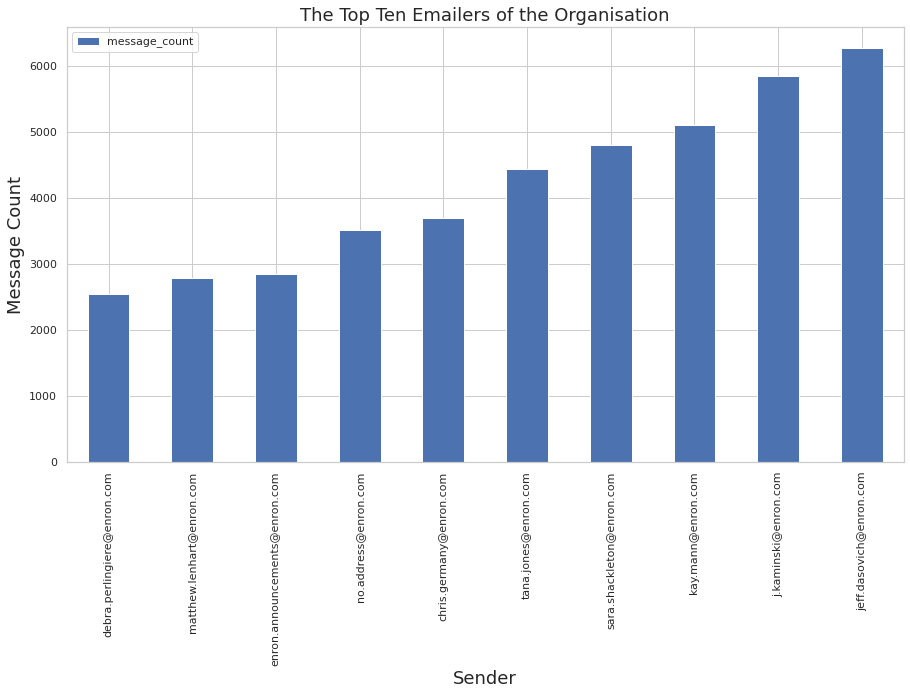

In [5]:
#Plotting top 10 senders. Info used from
# https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/#bar-charts-the-king-of-plots
# https://www.sidmartinbio.org/how-do-i-change-the-label-size-in-matplotlib/#How_do_I_change_the_label_size_in_Matplotlib

from matplotlib import pyplot as plt

#trying new styles
import seaborn as sns
sns.set_theme(style="whitegrid")

#Setting the size
plt.rcParams["figure.figsize"] = [15, 8]

#Plotting the data
top10_df.plot(x ='sender', y='message_count', kind = 'bar')

#Labeling the axis, and changing their font size.
plt.title("The Top Ten Emailers of the Organisation", fontsize = 18)
plt.xlabel("Sender", fontsize = 18)
plt.ylabel("Message Count", fontsize = 18)